<a href="https://colab.research.google.com/github/SaeSimcheon/machine_learning_basic/blob/main/week3/KSH/2_Ensemble1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diversity
: The main keyword of Ensemble


- Data diversity
- Model diversity

## Bagging & Boosting
: to obtain low bias & low variance algorithm

- **Bagging** 
  - In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
  - low bias & high variance (high model complexity) : DT, ANN, SVM, k-NN(with small k), etc
  -  $→$ low bias & variance

- **Boosting** 
  - By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
  - high bias & low variance (low complexity) : Logistic regression, LDA, k-NN(with large k), etc
  - $→$ low bias & variance



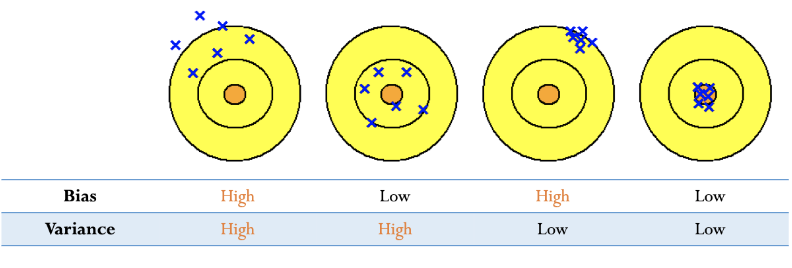

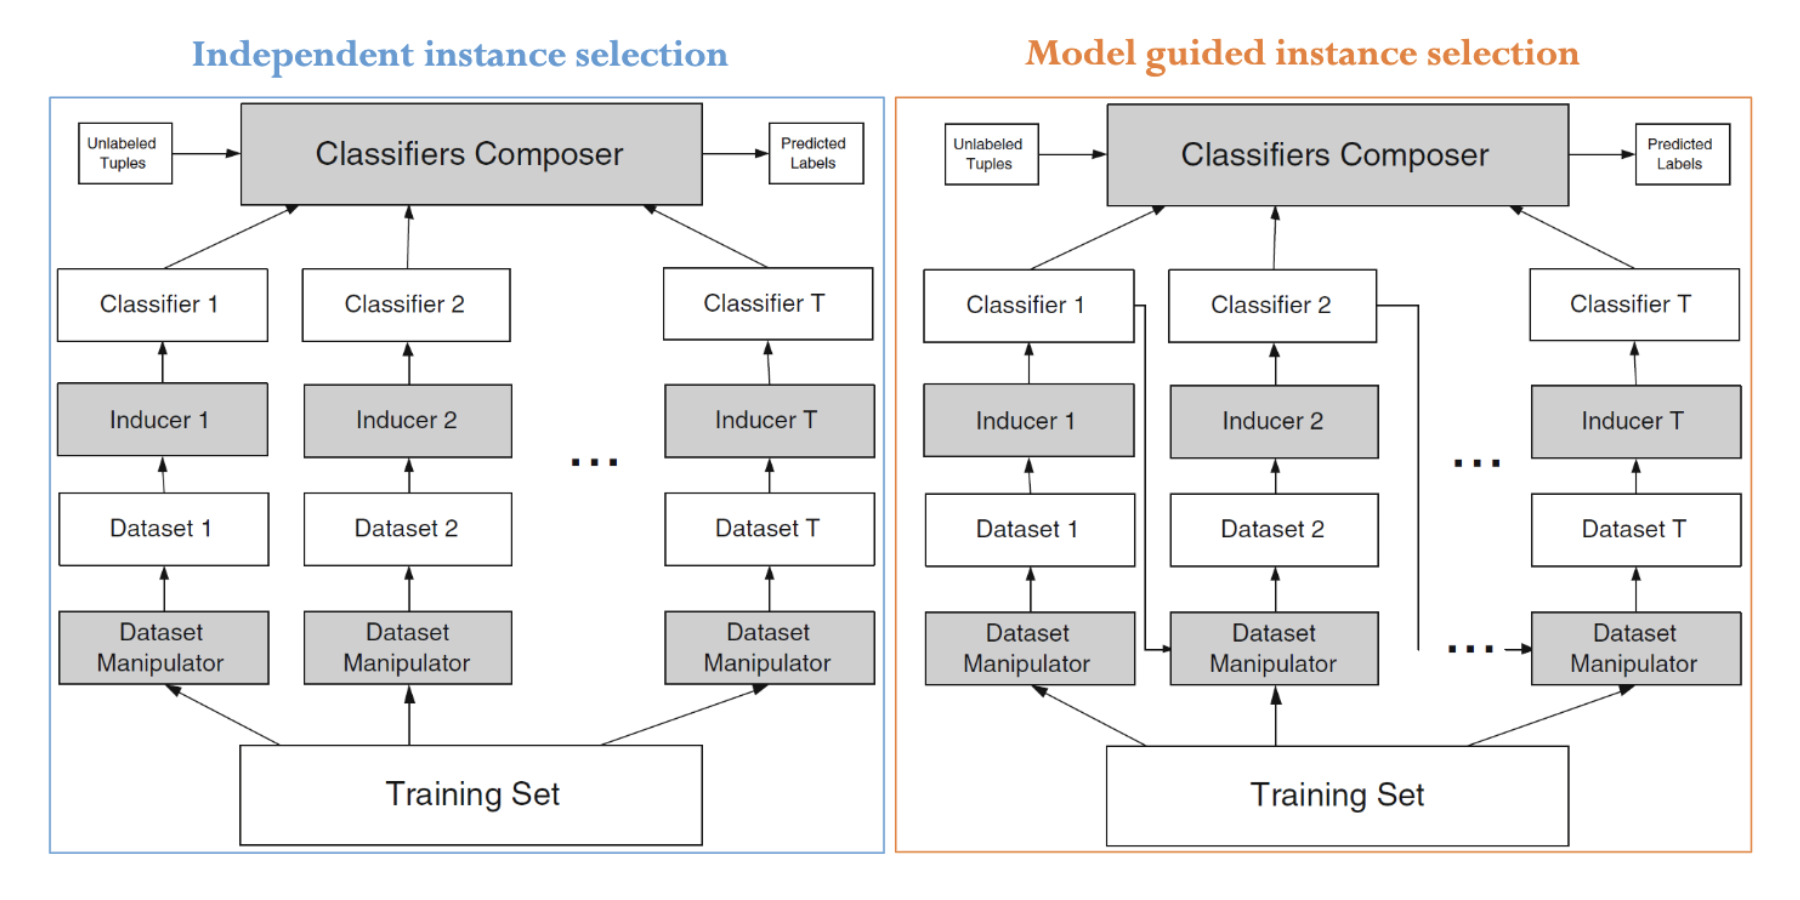


data 관점 diversity 에서 가장 먼저 시도 된 것이 K-fold data split.


# Sampling without Replacement



## K-fold data split
: Entire data is split into k blocks; each classifier is trained only on different subset of (k-1) blocks
- Limitation : $f_1 \neq f_2 \neq f_3 \neq ... \neq f_k$ independent 가 가정인데 실제로 $f_i, f_j$ 는 (k-2) folds 가 공통이기 때문에 ensemble 이 가질 수 있는 이상적인 성는에 도달하기 위해서는 한참 멀었다. & 전체 데이터 셋을 다 사용하지 않고 (k-1)fold 사용, 즉 하나 폴드를 손실하는 단점, 무작정 많이 만들어 내는 것에도 한계가 있다.


- Final output 
$$ \hat{y} = \delta(f_1(x), f_2(x), ..., f_{k-1}(x), f_k(x))$$
, where $δ(.)$ An aggreation function of individual outputs 
  - majority voting (classification)
  - simple average (reggression)

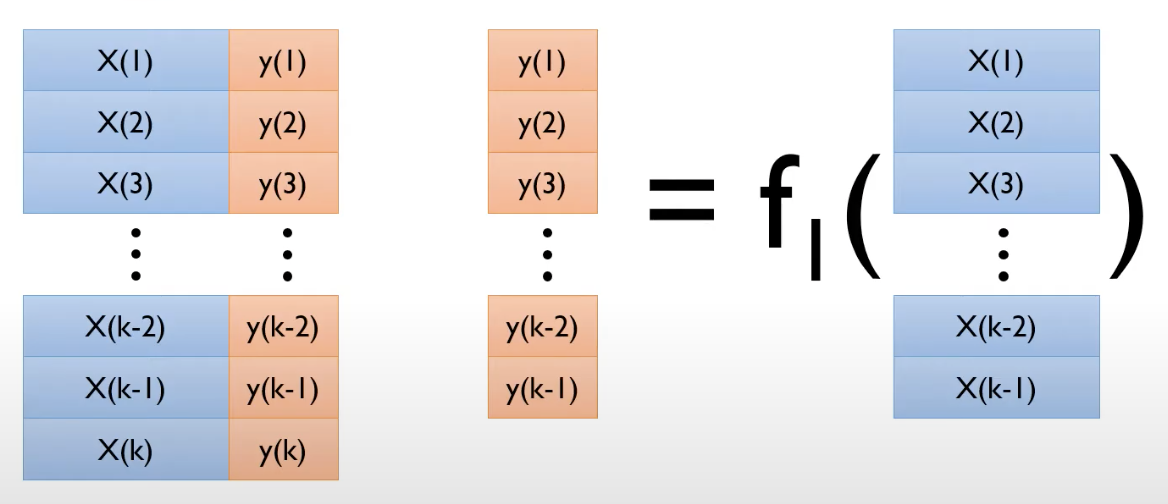


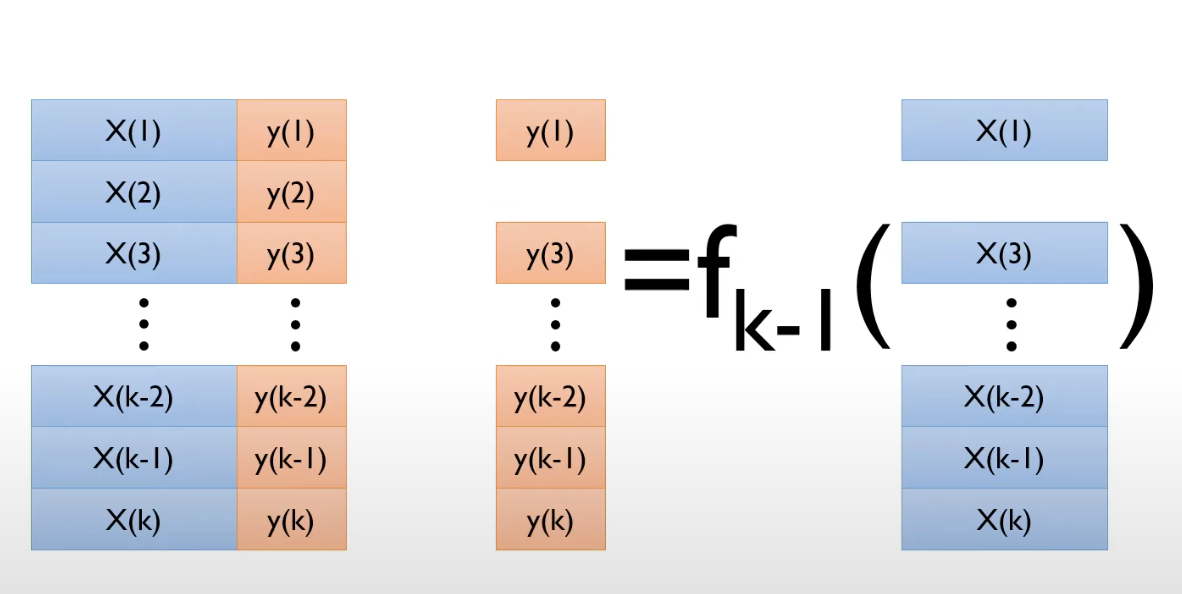

# Sampling with Replacement


## **B**ootstrap **Agg**regat**ing** : Bagging
These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

### 0. Main Idea

: 서로 다른 데이터 셋을 만듦에 있어서 "복원추출" 한다.

- Each member of the ensemble is constructed from a different training dataset
- Each dataset is generated by **sampling** from the total N data examples, choosing N items uniformly at random **with replacement**
- Each data sample is known as a bootstrap 




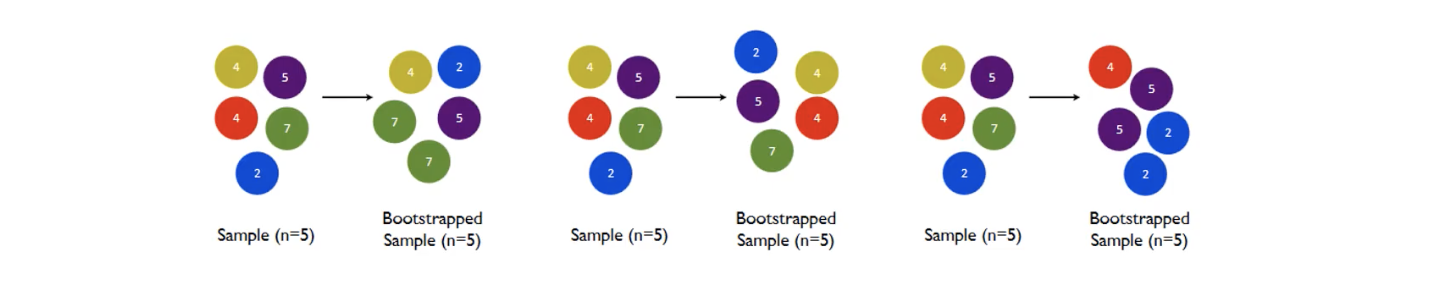

### 1. Bagging 장점 
  - 학습 관점에서 데이터의 분포를 왜곡시켜서 학습이 좀 더 정확하게 되도록 한다.
  - 검증 관점에서 전체 데이터가 모두 사용되고 역할을 바꿔가면서 학습과 검증을 반복하므로서 높은 일반화성능 확보 가능하다.



복원추출하면 원하는 만큼의 bootstrap 생성 가능!


Q : 그럼 반복적으로 샘플링 데이터 만들어 내는 것이 무슨 의미가 있나?\
A : (좋은 쪽으로) 데이터의 분포를 왜곡시켜서 학습이 좀 더 정확하게 되도록 한다.

$$y = f(x) + ϵ$$

여기서 $ϵ$ 이 주어진 data set 인데 여기서 반복 (복원 추출)부트스트랩 함으로서 $ϵ$가 가질 수 있는 범위나 분포를 바꿔주는 것 즉, 하나의 특정 noise(ϵ) 에 dependent 한 model 이 생성될수도 있는 위험을 방지할 수 있다.


- Probability that an instance is not inclueded in a bootstrap (하나의 객체가 단 한번도 선택되지 않을 수도 있는 확률)
$$p = (1-\frac{1}{N})^N$$
$$→ lim_{N→∞} (1-\frac{1}{N})^{\frac{N}{N}} = e^{-1} = 0.368$$

 N 이 일정 수준 이상 큰 수이면 
  - 2/3 은 Bootstrap에 1회 이상 샘플링 됨
  - 1/3 은 Bootstrap에 0회 샘플링 : **Out Of Bag (OOB)**

검증 관점에서... 만약 training 70%, validation 30% 로 데이터를 나누고 training 에서 Model 만들어서 validation 적용할 때 두 sets 에 따라서 결과가 달라지고 random하게 두 sets을 뽑아 수행하면 결과가 달라지겠다. 
Bagging 은 sampling 되지 않는 OOB data set 은 deterministic 이 아닌 probabilistic 하게 일정한 1/3 확률로 bootstrap 에 선택되지 않는다. 이것을 validation set 으로 쓰자. 그럼 bootstrap 으로 model 만들고 그것을 bootstrap 에 선택되지 않은 OOB 로 검증을하는 것을 여러번 반복하면, 전체 데이터가 모두 사용되고 역할을 바꿔가면서 학습과 검증을 반복 할 수 있다. 결과적으로 높은 일반화성능 확보 가능. 단순히 7:3 으로 나누는 것보다 훨씬 좋음.

### 2. work best with strong and complex models 
complex models 
= low bias & high variance algorithm\
= 복잡도가 높은 algorithm \
= 약간의 데이터 변화에도 모델의 결과가 크게 변하는 algorithm \
 = bias 가 낮지만 variance 가 높은 algorithm \
= NN, SVM, DT, etc




For example, Bagging with Decision Tree ($\neq$ Random Forest)

  - 아래의 Bagging 순서에서 Stage2 에 *Can be any supervised learning algorithm!*

  - NN, SVM, DT 가능
  - Logistic Regression, LDA (: high bias& low variance) 도 가능 but, Bagging 과 합이 잘 안맞음. 즉, Bagging 으로 원래 algorithm 의 성능이 유의미하게 향상되지 않을 가능성이 높다.

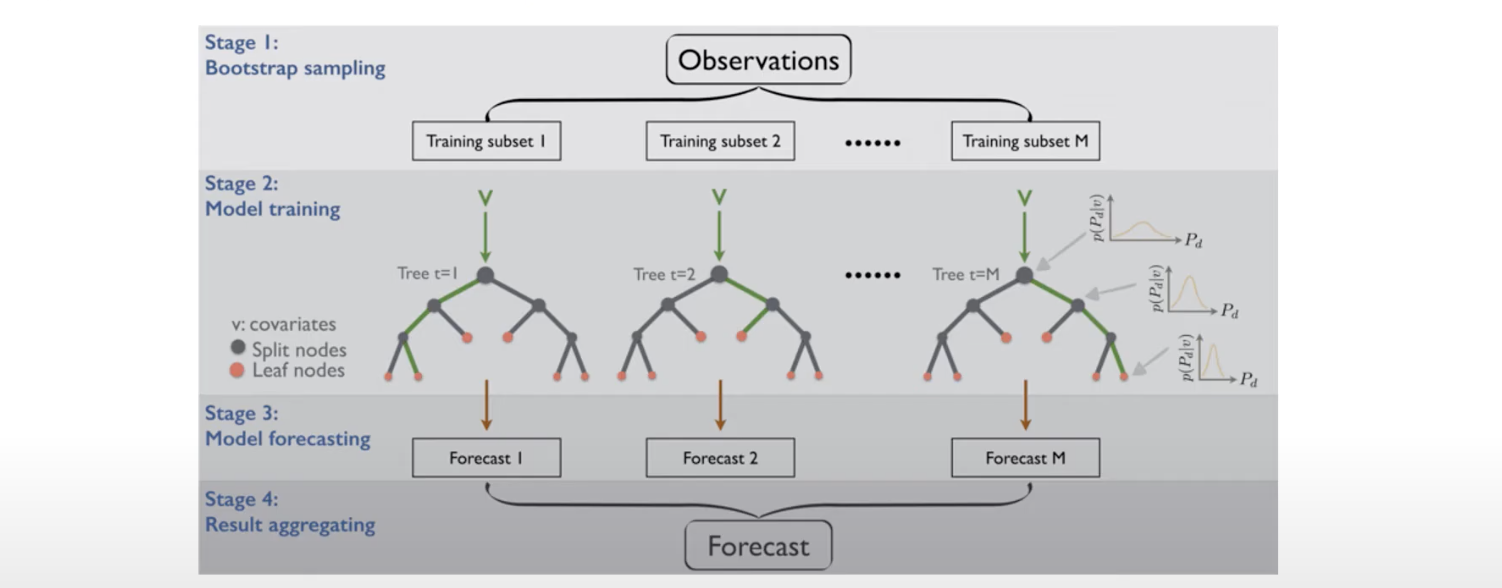

### 3. Result Aggregating
  - Majority voting, for classification problem 1

 $$\hat{y}_{Ensemble}=arg \underset{i}{max} (∑_{j=1}^{n} δ(\hat{y_j}=i), i\in \{0, 1\})$$ 


 For example,

 $$∑_{j=1}^{n} δ(\hat{y_j}=0) = 4  \ \ \ \ < \ \ \   ∑_{j=1}^{n} δ(\hat{y_j}=1) = 6$$
 $$\Downarrow$$
 $$\hat{y}_{Ensemble}=1$$







  - Weighted voting, for classification problem 2\
*weight = OOB Acc of individual model (model 에 가중치)*

$$\hat{y}_{Ensemble}=arg \underset{i}{max} (\frac{∑_{j=1}^{n} (OobAcc_j) \cdot δ(\hat{y_j}=i)}{∑_{j=1}^{n} (OobAcc_j)}, i\in \{0, 1\})$$ 

For example,

$$\frac{∑_{j=1}^{n} (OobAcc_j) \cdot δ(\hat{y_j}=0)}{∑_{j=1}^{n} (OobAcc_j)}=0.424  \ \ \ \ < \ \ \   \frac{∑_{j=1}^{n} (OobAcc_j) \cdot δ(\hat{y_j}=0)}{∑_{j=1}^{n} (OobAcc_j)} = 0.576$$
 $$\Downarrow$$
 $$\hat{y}_{Ensemble}=1$$


  - Weighted voting, for classification problem 3\
*weight = predicted probability for each class* (새로운 객체 instance 들의 각 모델에 대한 신뢰도 - 마지막 두 rows 는 모두 1 을 predict 하지만 $P(y=1)$ 크기가 0.98>0.57 이니까 윗 객체가 아래 객체보다 더 큰 영향을 줘야한다.)


   $$\hat{y}_{Ensemble}=arg \underset{i}{max} (\frac{1}{n}∑_{j=1}^{n} P(\hat{y_j}=i), i\in \{0, 1\})$$ 

For example,

$$\frac{1}{n}∑_{j=1}^{n} P(\hat{y_j}=0) = 0.375   \ \ \ \ < \ \ \   \frac{1}{n}∑_{j=1}^{n} P(\hat{y_j}=1)=0.625$$
$$\Downarrow$$
 $$\hat{y}_{Ensemble}=1$$



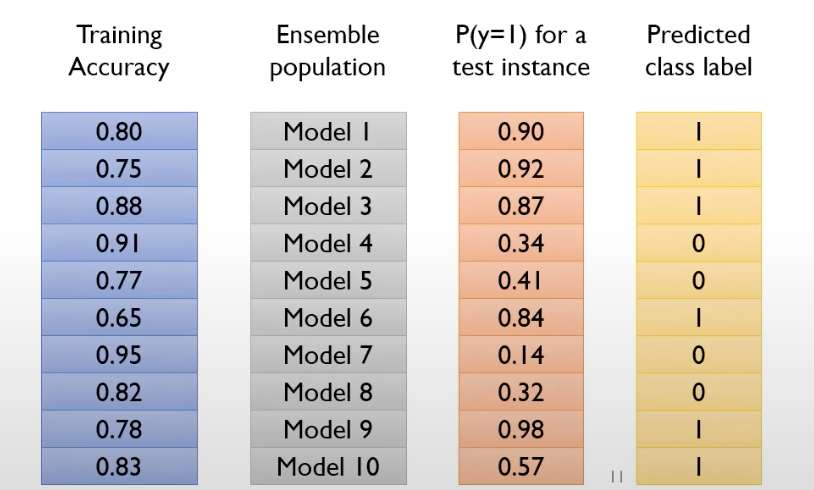

### 4. Result Aggregating : **Stacking**
Use *another prediction model (Meta-Classifier)* to aggregate the results
- Input : Predictions made by ensemble members
- Target : Actual true label







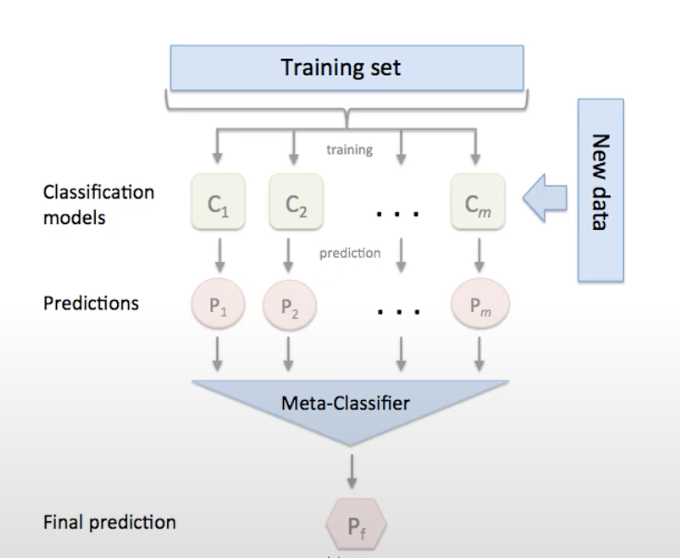


---

**Input** : Requried ensemble size T\
**Input** : Training set $S = {(x_1,y_1), ..., (x_N, y_N)}$\
**for** $t = 1$ to $T$ **do**
> Build a dataset $S_t$, by sampling $N$ items, randomly with replacement from $S$.

> Train a model $h_t$ using $S_t$, and add it to the ensemble.

**end for**\
For a new testing point $(x',y')$,\
If model outputs are continuous, combine then by averageing.\
If model outputs are class labels, combine them by voting.


---

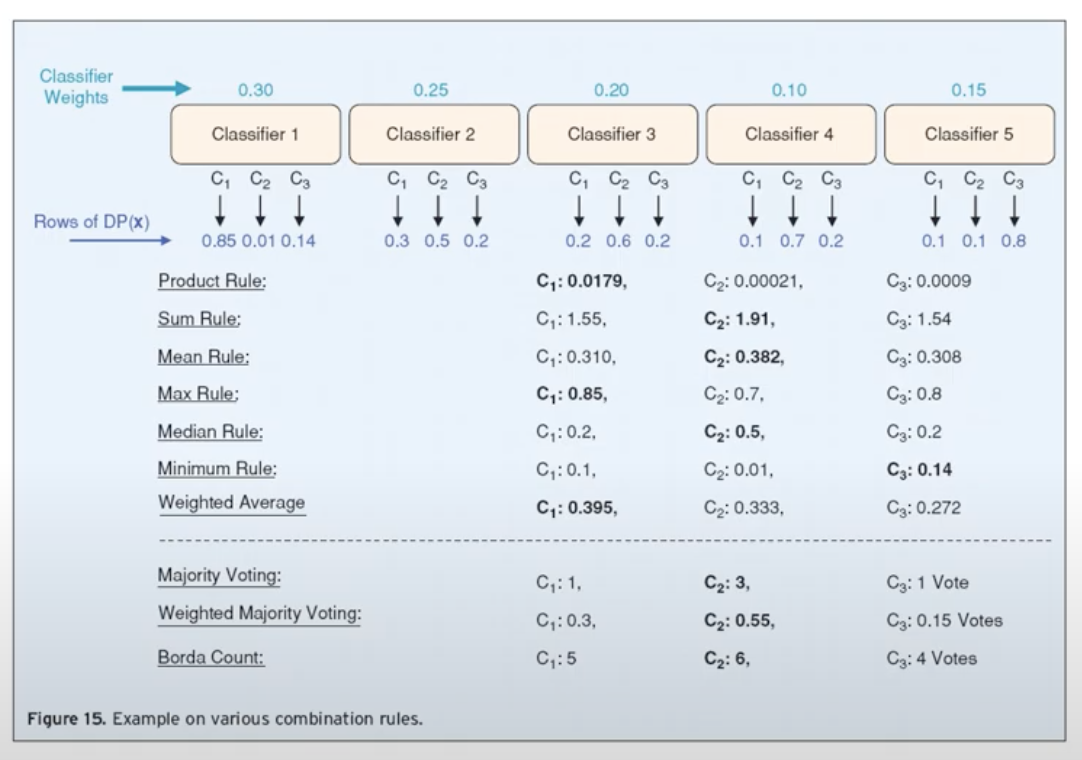

### 5. Code : Bagging


```
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,       # logistic regression 을 100개 훈련해서 앙상블하기
                            oob_score=True, n_jobs=-1, random_state=42)
```



```
oob_score=True  : bootstrap 에 포함되지 않은 sample (OOB) 으로 훈련된 모델 평가 (= OOB error)

oob_score=FALSE : default

print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))
```






In particular, `max_samples` and `max_features` control the size of the subsets (in terms of samples and features), while `bootstrap` and `bootstrap_features` control whether samples and features are drawn with or without replacement.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# a bagging ensemble of KNeighborsClassifier base estimators, 
# each built on random subsets of 50% of the samples and 50% of the features.
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)  

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

#### Example ` breast_cancer` : LogisticRegression based Bagging 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,       # logistic regression 을 100개 훈련해서 앙상블하기
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.953
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.944


#### Example ` two_moon` : DecisionTree based Bagging





In [ ]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, 
                           oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)


print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xm_train, ym_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xm_test, ym_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.987
테스트 세트 정확도: 0.880
OOB 샘플의 정확도: 0.840


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


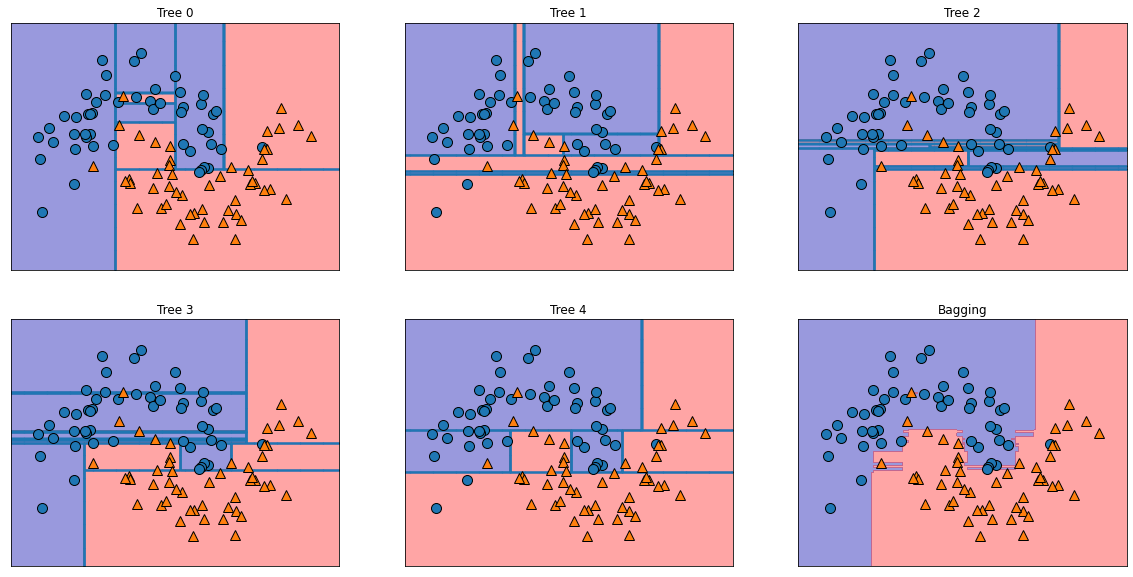

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

#### Example `breast_cancer` : DecisionTree based Bagging


In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


## **Random Forests**
A specialized bagging for decision tree algorithms


decision tree 의 주요 단점은 test data set 의 overfitting, 잘 작동하되 **서로 다른 방향으로 과대적합된 트리를 많이 만들면 (트리를 랜덤하게 만들기 : generate tree with high diversity)** 그 결과를 평균내므로써 과대적합된 양을 줄일 수 있다. 

### 0. Two ways to increase the diversity of ensemble
- Bagging ( Bootstrap sampling → Boostrap sample + OOB data
- Randomly chosen predictor variables (to construct tree with Bootstrap sample)

For decision tree, split(recursively partitioning) w.r.t. all explanetory variables ( $p$ ). But for random forests, we select only $m ( <p)$ variables for split even if the information gain is lower than model with $p$ variables.:
recursive partitioning 에 쓰는 변수를 선택적으로 사용하자! 다양성이 확보됨. 각 tree 에서 information gain 은 떨어질 수 있어도 그 것들을 합할 때 시너지를 낼 수 있다.

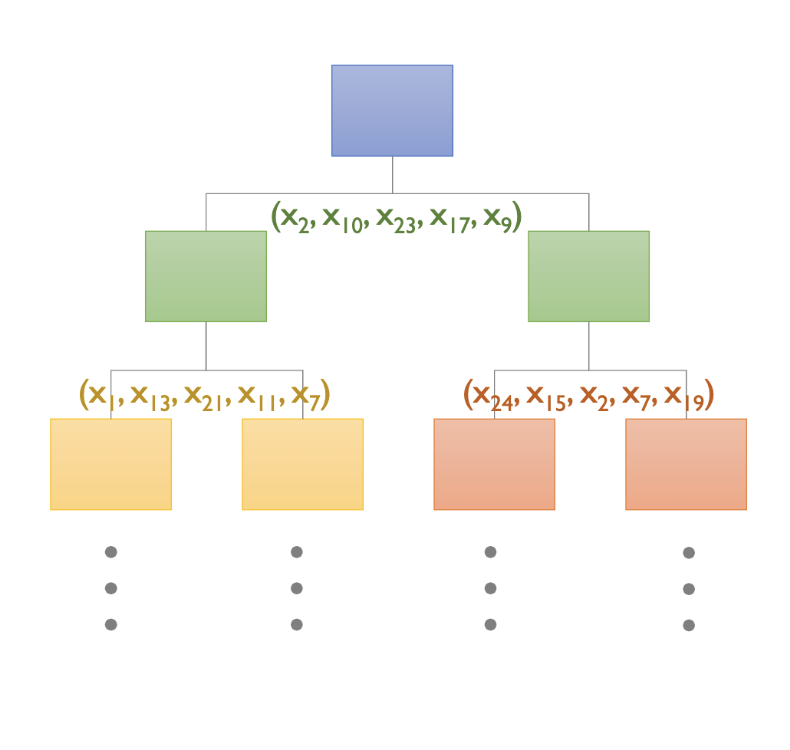

### 1. Generalization Error
- Each tree in random forests may over-fit the data because pruning is not conducted.
- If the population size is large enough, then the generalization error of randomf forests bounded by 
  - $\bar\rho$ : the mean value of the correlation coefficients between individual trees
  - $s^2$ : the margin function for binary classification, it is simply the average difference proportions between the correct and incorrect trees over all trainging data.

$$Generalization Error \leq \frac{\bar\rho(1-s^2)}{s^2}$$

- The more accurate the individual classifiers ⇒ the larger the $s^2 ⇒$ the lower the $GeneraliztionError$ 
- The less corrleated among the classifiers ⇒ the lower the $GeneraliztionError$ 


**즉, 개별 tree 들의 성능이 좋고 tree들 간의 correlation 이 적을 수 록 $GeneraliztionError$  작다!**



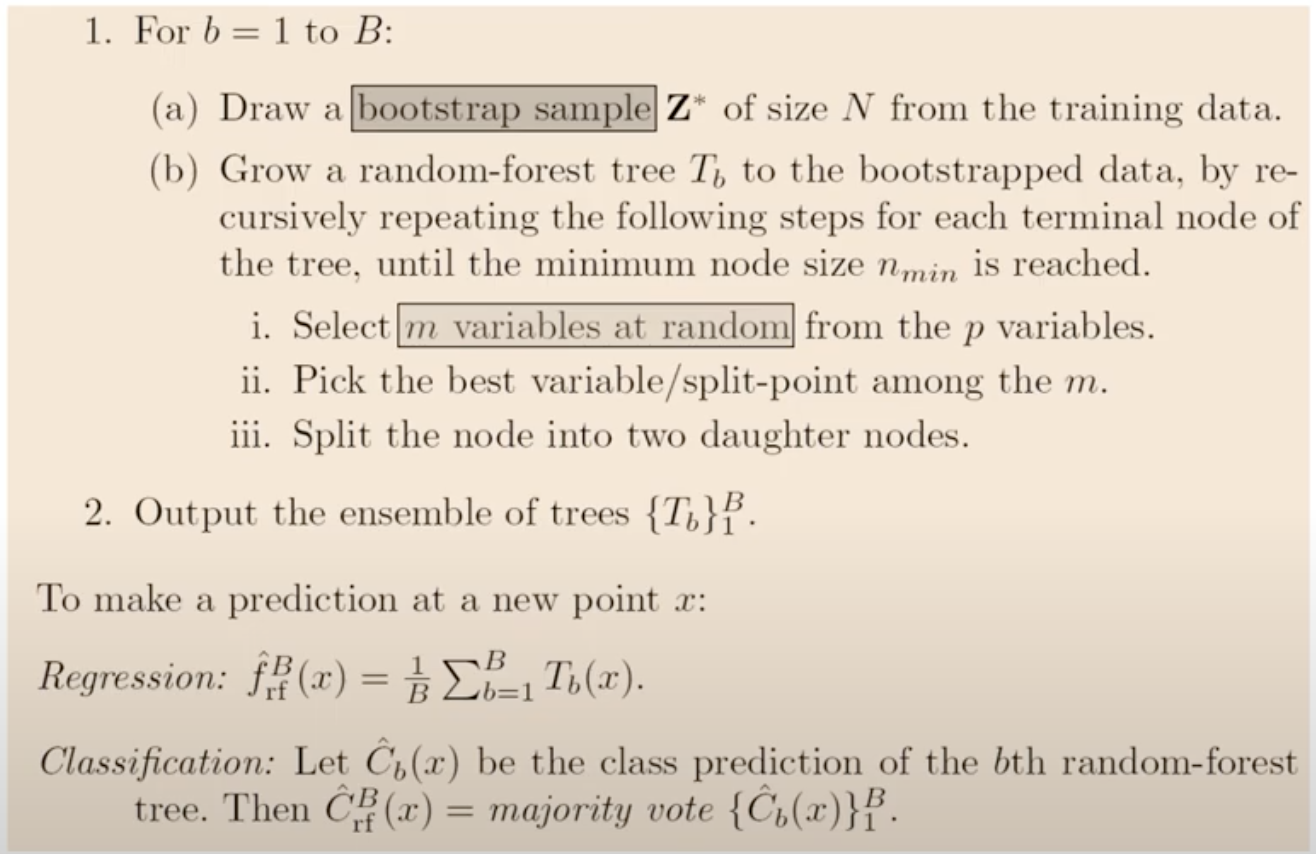

### 2. Variable Importance

1.   Compute the OOB error for the original dataset($e_i$) : 부트스트랩 으로 모델링하고 부트스트랩에 뽑히지 않은 OOB 데이터를 test set 으로 error 구하는 것
2.   Compute the OOB error for the dataset in which the variable $x_i$ is permuted ($p_i$) 

: $x_i$ 의 importance 를 구할 때, $x_i$ 를 섞어서 OOB error 를 구함. 만약 $x_i$ 가 split 에 사용되었다면 즉, bootstrap 에 포함된다면 $x_i$ 섞어서 modeling 하면 모델이 달라지니까 OOB error (test error) 커짐 $p_i > e_i$, 자주 사용 될 수록 더 커짐. $x_i$ 가 OOB 에 속한다면 (split 에 사용 X) $x_i$ 섞어도 model 은 똑같으니까 $p_i = e_i$

3. step3 : Compute the **variable importance** based on the mean and standard deviation of ($p_i-e_i$) over all trees in the population


- OOB error difference between permutating $x_i$ for $m^{th}$ tree 
$$d_i^m = p_i^m - e_i^m$$

- Mean & Variance of OOB error difference between permutating $x_i$ for whole tree
$$\bar{d_i} = \frac{1}{m}\sum_{i=1}^md_i^m $$
$$s_i^2 = \frac{1}{m-1}\sum_{i=1}^m (d_i^m-\bar{d_i})^2 $$


- Variable Importance of variable $x_i$

$$v_i = \frac{\bar{d_i}}{s_i}$$


High Variable Importance ⇒ Random permutation 전-후 의 OOB error 차이가 크다 & 그 편차는 작다 (일정하게 중요도가 계속 높음)


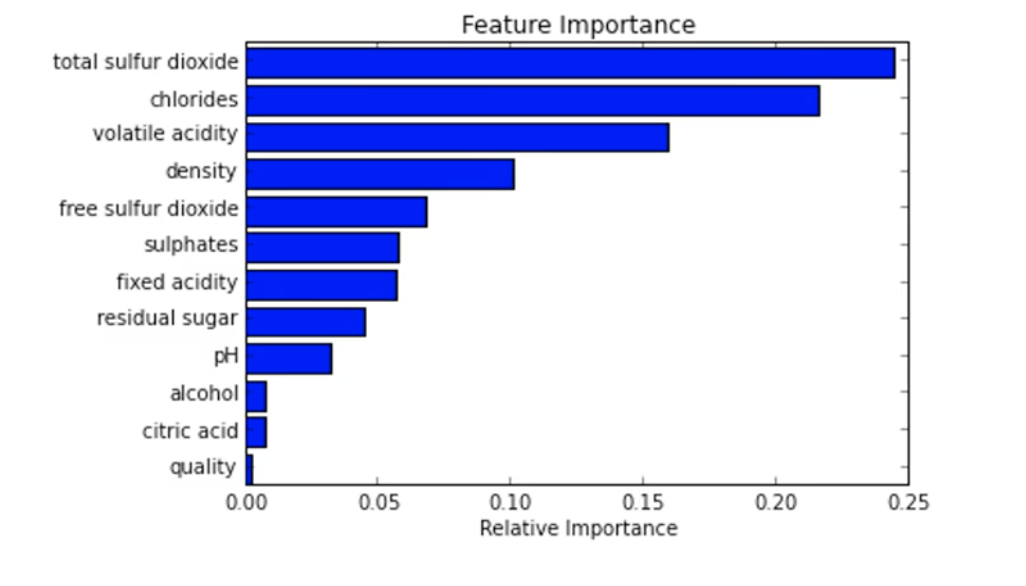

### 3. Code : Random Forests 

#### Example ` two_moon` : Random Forest with 5 trees

- construct Random Forest with 5 trees → 각 트리는 attribute `.estimators_`  에 저장된다.

```
forest = RandomForestClassifier(n_estimators=5, random_state=2)
```



```
forest.estimators_
```




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# tree 5개로 구성된 rf model 만들기
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
 
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
plt.rc('font', family='NanumBarunGothic') 
!pip install mglearn 
import mglearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and di

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_

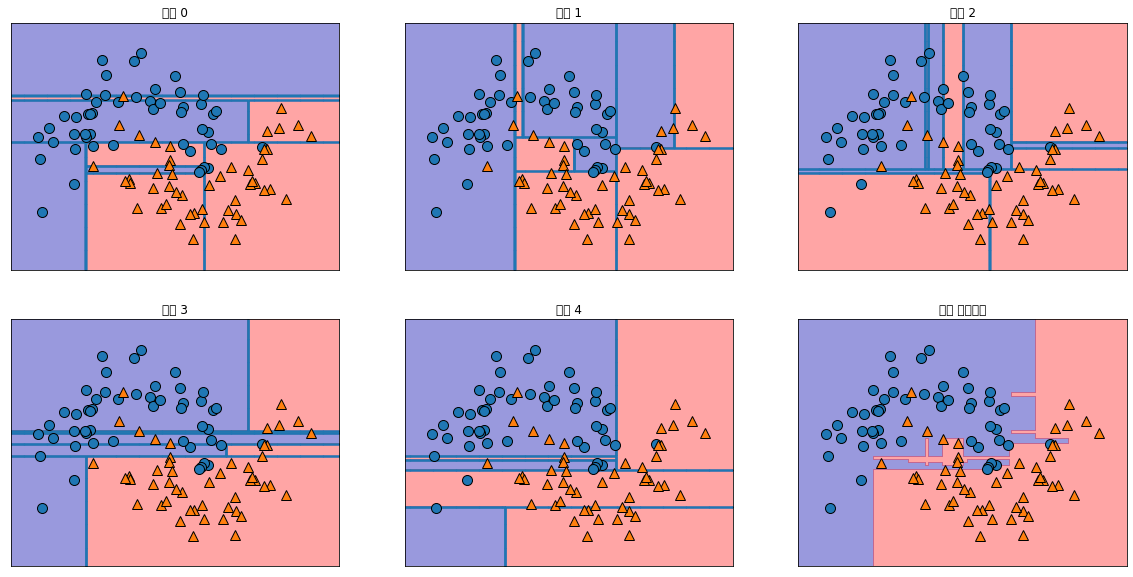

In [ ]:
# 만들어진 tree 들의 결정 경계 (split partition) 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show() # 책에는 없음

#### Example `breast_cancer` : Random Forest with 100 trees

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))  # 매개변수 튜닝 없이도 LDA, DT 보다 높은 RF 의 test acc 결과!

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

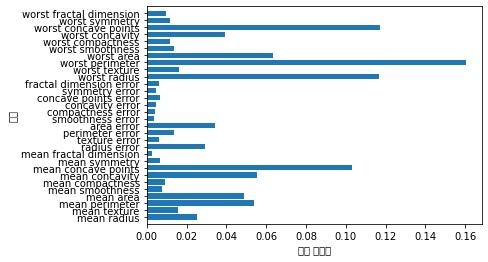

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


plot_feature_importances_cancer(forest) # 단일 tree 보다 많은 feature 들에서 0 이상의 feature importance 를 가짐

```
max_features : # of variables for split (얼마나 트리가 무작위가 될지 결정)
```
select only 𝑚(≤ 𝑝) variables for split : `max_features` 
≤ `n_features`

- `max_features` 값을 크게하면 rf 트리들은 비슷해지고 가장 두드러진 **features** 을 이용해서 data 에 잘 맞춰진다. 
- `max_features` 을 낮추면 rf 트리들은 많이 달라지고 각 트리는 **data** 에 맞추기 위해 깊이가 깊어진다. (과대적합 방지)

- `max_features=1` : tree split 은 feature 를 고르지 않고 그냥 random 하게 선택한 feature 로 나눠진다.

`max_features` 는 default 로 쓰는 것이 일반적으로 좋다.
- `max_features = sqrt(n_features)` for classification
- `max_features = n_features` for regression

`max_features` 와 `max_leaf_nodes` 를 조정하면 가끔 성능이 향상되기도 하고 훈련, 예측에 필요한 메모리와 시간을 줄일 수 있다.




```
n_estimators
```


```
n_jobs : # of CPU core 

```



```
max_depth : # pre-pruning
```



## **Boosting**
AdaBoosting/GradientBoosting/XGBoosting/LightGBM/CatBoost


cf. Bagging parallell ok / Boosting parallell X ($\because$ 성능 평가? ) $\Rightarrow$ 근데 보통 Bagging 의 base learning 가 complex 해서 Boosting 이 더 빠름!

## **Ada**ptive **Boosting** : **AdaBoost**

- Strong model vs. **Weak model**
  - Week model : performing only slightly better than random guessing
  - for example, a model with 60% accuracy construected with a training set which has 1 and 0 in the same ratio
  - *Week model could be boosted in to arbitrarily accurate strong model : Adaboost*

- New classifiers should **focus on difficult cases** : 새로운 모델은 앞에서 어려웠던 case 에 focus 한다.

### 0. Main Idea
: Week model 에 적절한 가이드(focus on difficult case)만 주어지면 굉장히 정확한 strong model 까지 성능 향상이 가능하다!

1. Examine the learning set (trianing data 준비)
2. Get some rule of thumb (weak model)
3. (week model 이 잘 맞추고 잘 못 맞추고를 보고 잘 못푸는 것에 가중합하기) Reweight the examples of the training set, concentrate on hard cases for the previous rule
4. Derive the next rule of thumb (2nd weak model 만들기)\
...
5. Build a single, accurate predictor by combining the rules of thumb

- Train model sequentially, with a new model at each round → at each round, misclassified examples are identifed and have their emphasis increased in a new training set which is then feed back into the next round (오분류 된 exampled을 새 데이터 셋에 더 많이 나올 수 있게 가중치를 줌) → large errors made by earlier model can be compensated by the subsequent models

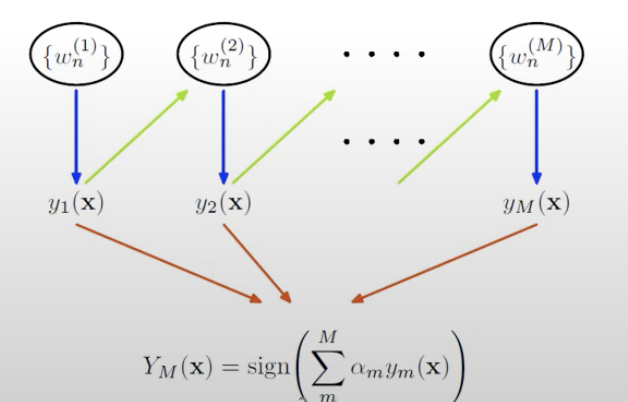

 
---

**Input** : Requried ensemble size T\
**Input** : Training set $S = {(x_1,y_1), ..., (x_N, y_N)}$ where $y_i \in \{-1, +1\}$\
Define a uniform distribution $D_1(i)$ over elements of $S$.\
**for** $t = 1$ to $T$ **do**

> Train a model $h_t$ using distribution $D_t$.

> Calculate $\epsilon_t=P_{D_t}(h_t(x)\neq y)$

> If $\epsilon_t ≥ 0.5$ break

> Set $\alpha_t = \frac{1}{2}ln(\frac{1-\epsilon_t}{\epsilon_t})$

> Update $D_{t+1}(i)= \frac{D_t(i)exp(-\alpha_ty_ih_t(x_i))}{Z_t}$ where $Z_t$ is a normalization factor so that $D_{t+1}$ is a valid distribution.


**end for**\
For a new testing point $(x',y')$,\
$H(x')=sin(\sum_{t=1}^T \alpha_th_t(x'))$

---

- $𝐷_1(𝑖)$ : 첫번째 데이터에 example $i$ 가 선택될 확률 처음에는 uniform 하게 주기
-  $h_t$ : stumptree, weak model
- $ϵ_t$ : 오분류 확률 근데 이게 0.5 보다 크면 random model 보다 별로이니까 다시해서 random guessing 보다는 조금 더 좋게 만든다.
- $α_t$ 다음 모델 더할 때 가중치인데 $ϵ_t \doteqdot 0.5$ 일 때 $α_t \doteqdot 0$ 이게 값을 부여해서 오분류가 random guessing 에 가까울 때 가중치를 줄이고 $ϵ_t \doteqdot 0$ 일 때 $α_t \uparrow$ 
- $D_{t+1}(i)$
  - $D_{t}(i)$ : t 시점의 선택 확률이 기준점 
  - $α_t$ 클 수록 모델이 정확하니까 가중치 증폭하자, $h_t$ 가 정확하면 sampling rate 에 변동성을 키우자
  - $y_ih_t(x_i) = \begin{cases}
1, & \mbox{if }y_i=h_t(x_i) : h_t \mbox{가 }i\mbox{의 정답}\\
-1, & \mbox{if }y_i\neq h_t(x_i) : \mbox{정답 아니라서}  exp  \mbox{안이 마이너스가 되면 0 에 가까워짐}
\end{cases}$


알고리즘 다시 정리!

the selection prob. of $x_i$ for the next training data set : $$D_{t+1}(i)= \frac{D_t(i)exp(-\alpha_ty_ih_t(x_i))}{Z_t}$$

- $h_t$가 $i$의 정답 : $(y_i, h_t(x_i)) = (-1,-1)$ or $(1,1)$ → $y_ih_t(x_i)=1$ → $α_ty_ih_t(x_i)<0$ → $p$ decrease
-  $h_t$가 $i$의 오답 : $(y_i, h_t(x_i)) = (1,-1)$ or $(-1,1)$ → $y_ih_t(x_i)=-1$ → $\alpha_ty_ih_t(x_i)>0$ → $p$ increase !!


### 1. Code : AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("AdaBoost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(Xc_test, yc_test)))

In [ ]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

## **GradientBoosting**

### Code : GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

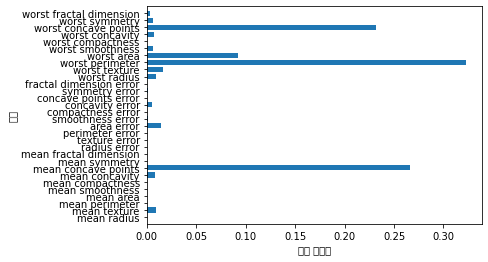

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

```
learning_rate : 이전 트리의 오차를 보정하는 정도를 조절
```

```
n_estimators : # of tree
```

- `learning_rate` 낮추면 비슷한 복잡도의 모델 만들기 위해서 `n_estimators` 높여야한다(: 더 많은 트리를 추가해야한다).
- `n_estimators`  높으면 RF 는 성능 좋았지만 
- `n_estimators` 높으면 GradientBoosting 에서는 model complexity 가 커지고 overfitting 가능성이 높아진다.

$⇒$ 따라서 가용가능한 시간과 메모리 한도에서 `n_estimators` 를 낮추고 적절한 `learning_rate`를 찾자! 

조기종료를 위한 매개변수 `n_iter_no_change` & `validation_fraction`

```
n_iter_no_change
```


```
validation_fraction
```





```
max_depth : 보통 GradientBoosting 에서는 5이하로 설정한다
```

